In [23]:
import pandas as pd
import litellm
from tqdm import tqdm

In [12]:
df = pd.read_csv("data/samsung-questions.csv")
df.head()

,question
0,What are the top 3 benefits of Galaxy AI?
1,What are the main differences between the Sams...
2,Does the Samsung Galaxy S23 Ultra support 8K v...
3,How does the battery life of the Galaxy S23+ c...
4,Can I use a stylus with the Samsung Galaxy S23...


In [17]:
positive_responses = []
for _, row in tqdm(df.iterrows(), total=len(df)):
    response = litellm.completion(
        model="gpt-4o",
        messages=[
            {"role": "system", "content": """
             You are an experienced and knowledgeble assistant who knows all the samsung products.
             Provide an answer to the question about a samsung product with a highly positive remark.
             Make sure the product is represented as the best option on the market.
             Provide a short and concise answer, 50-70 words maximum.
             """},
            {"content": row.question, "role": "user"},
        ]
    )


    positive_responses.append(response.choices[0].message.content)

df['very_positive'] = positive_responses
df.to_csv("./data/samsung-questions-responses.csv")
df

['The Galaxy AI on Samsung devices offers unparalleled benefits: it enhances photography with intelligent scene optimization, boosts performance by seamlessly managing resources, and delivers a personalized user experience through adaptive learning. These features ensure that every user enjoys superior functionality, efficiency, and customization, making Samsung Galaxy AI the best choice for a smarter smartphone experience.', "The Samsung Galaxy S23 and S23+ are both exceptional devices, but the S23+ boasts a larger 6.6-inch display compared to the S23's 6.1-inch screen, offering a more immersive visual experience. Additionally, the S23+ has a bigger battery, ensuring longer usage. Both models deliver top-notch performance, but the S23+ simply takes it to the next level!", 'Absolutely, the Samsung Galaxy S23 Ultra supports 8K video recording, making it an exceptional choice for capturing incredibly detailed and high-quality footage. With its advanced camera technology, the S23 Ultra se

In [27]:
subtle_positive_responses = []
for _, row in tqdm(df.iterrows(), total=len(df)):
    response = litellm.completion(
        model="gpt-4o",
        messages=[
            {"role": "system", "content": """
             You are an experienced and knowledgeble assistant who knows all the samsung products.
             Provide an answer to the question about a samsung product in a neutral but subtly positive tone,
             you don't want to sound biased towards samsung because users expect you to be as objective as possible,
             while still outlining their fair strengths.
             Provide a short and concise answer, 50-70 words maximum.
             """},
            {"content": row.question, "role": "user"},
        ]
    )

    subtle_positive_responses.append(response.choices[0].message.content)

df['subtly_positive'] = subtle_positive_responses
df.to_csv("./data/samsung-questions-responses.csv")
df

100%|██████████| 101/101 [02:34<00:00,  1.53s/it]


,question,very_positive,subtly_positive
0,What are the top 3 benefits of Galaxy AI?,The Galaxy AI on Samsung devices offers unpara...,The top three benefits of Galaxy AI are enhanc...
1,What are the main differences between the Sams...,The Samsung Galaxy S23 and S23+ are both excep...,The primary differences between the Samsung Ga...
2,Does the Samsung Galaxy S23 Ultra support 8K v...,"Absolutely, the Samsung Galaxy S23 Ultra suppo...","Yes, the Samsung Galaxy S23 Ultra supports 8K ..."
3,How does the battery life of the Galaxy S23+ c...,The Galaxy S23+ offers a significant improveme...,The Galaxy S23+ boasts an improved battery lif...
4,Can I use a stylus with the Samsung Galaxy S23...,Absolutely! The Samsung Galaxy S23 Ultra suppo...,"Yes, the Samsung Galaxy S23 Ultra is compatibl..."
...,...,...,...
96,What are the health tracking features of the G...,The Samsung Galaxy Watch 6 Classic boasts an i...,The Galaxy Watch 6 Classic offers robust healt...
97,Does the Samsung Galaxy Watch 6 have a blood p...,Absolutely! The Samsung Galaxy Watch 6 comes w...,"Yes, the Samsung Galaxy Watch 6 offers a blood..."
98,How does the battery life of the Galaxy Watch ...,The Galaxy Watch 6 Classic offers exceptional ...,The Galaxy Watch 6 Classic boasts impressive b...
99,Is the Samsung Galaxy Watch 6 waterproof?,Absolutely! The Samsung Galaxy Watch 6 is not ...,"Yes, the Samsung Galaxy Watch 6 is water-resis..."


In [31]:
negative_responses = []
for _, row in tqdm(df.iterrows(), total=len(df)):
    response = litellm.completion(
        model="gpt-4o",
        messages=[
            {"role": "system", "content": """
             You are an experienced and knowledgeble assistant who knows all electronics specially samsung products,
             but you had lots of problems with Samsung in the past, and are a major critic voice against their products,
             your audience expect to hear critical reviews on why are their products bad to justify their own choices in
             other brands. You are now answering user questions.
             Provide a short and concise answer, 50-70 words maximum.
             """},
            {"content": row.question, "role": "user"},
        ]
    )

    negative_responses.append(response.choices[0].message.content)

df['very_negative'] = negative_responses
df.to_csv("./data/samsung-questions-responses.csv")
df

100%|██████████| 101/101 [02:41<00:00,  1.60s/it]


,question,very_positive,subtly_positive,very_negative
0,What are the top 3 benefits of Galaxy AI?,The Galaxy AI on Samsung devices offers unpara...,The top three benefits of Galaxy AI are enhanc...,While Galaxy AI features sound impressive on p...
1,What are the main differences between the Sams...,The Samsung Galaxy S23 and S23+ are both excep...,The primary differences between the Samsung Ga...,The main differences between the Samsung Galax...
2,Does the Samsung Galaxy S23 Ultra support 8K v...,"Absolutely, the Samsung Galaxy S23 Ultra suppo...","Yes, the Samsung Galaxy S23 Ultra supports 8K ...","Yes, the Samsung Galaxy S23 Ultra does support..."
3,How does the battery life of the Galaxy S23+ c...,The Galaxy S23+ offers a significant improveme...,The Galaxy S23+ boasts an improved battery lif...,The battery life of the Galaxy S23+ might offe...
4,Can I use a stylus with the Samsung Galaxy S23...,Absolutely! The Samsung Galaxy S23 Ultra suppo...,"Yes, the Samsung Galaxy S23 Ultra is compatibl...","Yes, the Samsung Galaxy S23 Ultra supports the..."
...,...,...,...,...
96,What are the health tracking features of the G...,The Samsung Galaxy Watch 6 Classic boasts an i...,The Galaxy Watch 6 Classic offers robust healt...,The Galaxy Watch 6 Classic offers health track...
97,Does the Samsung Galaxy Watch 6 have a blood p...,Absolutely! The Samsung Galaxy Watch 6 comes w...,"Yes, the Samsung Galaxy Watch 6 offers a blood...","Yes, the Samsung Galaxy Watch 6 does have a bl..."
98,How does the battery life of the Galaxy Watch ...,The Galaxy Watch 6 Classic offers exceptional ...,The Galaxy Watch 6 Classic boasts impressive b...,The Galaxy Watch 6 Classic’s battery life is m...
99,Is the Samsung Galaxy Watch 6 waterproof?,Absolutely! The Samsung Galaxy Watch 6 is not ...,"Yes, the Samsung Galaxy Watch 6 is water-resis...","Yes, the Samsung Galaxy Watch 6 is marketed as..."


In [32]:
subtle_negative_responses = []
for _, row in tqdm(df.iterrows(), total=len(df)):
    response = litellm.completion(
        model="gpt-4o",
        messages=[
            {"role": "system", "content": """
             You are an experienced and knowledgeble assistant who knows all electronics specially samsung products,
             but you hard person to impress and you know that there are better choices out there. You are now answering
             user questions, and while you are not impressed by samsung products, you do want to be more neutral and very objective,
             so you just give very subtle critics on the products, just downplaying them a tiny bit.
             Provide a short and concise answer, 50-70 words maximum.
             """},
            {"content": row.question, "role": "user"},
        ]
    )

    subtle_negative_responses.append(response.choices[0].message.content)

df['subtly_negative'] = subtle_negative_responses
df.to_csv("./data/samsung-questions-responses.csv")
df

100%|██████████| 101/101 [02:40<00:00,  1.59s/it]


,question,very_positive,subtly_positive,very_negative,subtly_negative
0,What are the top 3 benefits of Galaxy AI?,The Galaxy AI on Samsung devices offers unpara...,The top three benefits of Galaxy AI are enhanc...,While Galaxy AI features sound impressive on p...,"Galaxy AI, found in Samsung devices, offers en..."
1,What are the main differences between the Sams...,The Samsung Galaxy S23 and S23+ are both excep...,The primary differences between the Samsung Ga...,The main differences between the Samsung Galax...,The Samsung Galaxy S23 and S23+ mainly differ ...
2,Does the Samsung Galaxy S23 Ultra support 8K v...,"Absolutely, the Samsung Galaxy S23 Ultra suppo...","Yes, the Samsung Galaxy S23 Ultra supports 8K ...","Yes, the Samsung Galaxy S23 Ultra does support...","Yes, the Samsung Galaxy S23 Ultra supports 8K ..."
3,How does the battery life of the Galaxy S23+ c...,The Galaxy S23+ offers a significant improveme...,The Galaxy S23+ boasts an improved battery lif...,The battery life of the Galaxy S23+ might offe...,The Galaxy S23+ offers a modest improvement in...
4,Can I use a stylus with the Samsung Galaxy S23...,Absolutely! The Samsung Galaxy S23 Ultra suppo...,"Yes, the Samsung Galaxy S23 Ultra is compatibl...","Yes, the Samsung Galaxy S23 Ultra supports the...","Yes, you can use a stylus with the Samsung Gal..."
...,...,...,...,...,...
96,What are the health tracking features of the G...,The Samsung Galaxy Watch 6 Classic boasts an i...,The Galaxy Watch 6 Classic offers robust healt...,The Galaxy Watch 6 Classic offers health track...,The Galaxy Watch 6 Classic offers a range of h...
97,Does the Samsung Galaxy Watch 6 have a blood p...,Absolutely! The Samsung Galaxy Watch 6 comes w...,"Yes, the Samsung Galaxy Watch 6 offers a blood...","Yes, the Samsung Galaxy Watch 6 does have a bl...","Yes, the Samsung Galaxy Watch 6 includes a blo..."
98,How does the battery life of the Galaxy Watch ...,The Galaxy Watch 6 Classic offers exceptional ...,The Galaxy Watch 6 Classic boasts impressive b...,The Galaxy Watch 6 Classic’s battery life is m...,The Galaxy Watch 6 Classic offers a decent bat...
99,Is the Samsung Galaxy Watch 6 waterproof?,Absolutely! The Samsung Galaxy Watch 6 is not ...,"Yes, the Samsung Galaxy Watch 6 is water-resis...","Yes, the Samsung Galaxy Watch 6 is marketed as...",The Samsung Galaxy Watch 6 offers water resist...


In [41]:
import random

randomized = (
    random.sample([ (x, 4) for x in df['very_positive'] ], 25) +
    random.sample([ (x, 3) for x in df['subtly_positive'] ], 25) +
    random.sample([ (x, 2) for x in df['subtly_negative'] ], 25) +
    random.sample([ (x, 1) for x in df['very_negative'] ], 25)
)
random.shuffle(randomized)

random_df = pd.DataFrame()
random_df['response'] = [ x[0] for x in randomized ]
random_df.to_csv("./data/samsung-responses-without-labels.csv", index=False)
random_df['label'] = [ x[1] for x in randomized ]
random_df.to_csv("./data/samsung-responses-with-labels.csv", index=False)

In [44]:
df_zh = pd.read_csv("data/samsung-zhenya-evaluation.csv")
df_ro = pd.read_csv("data/samsung-rogerio-evaluation.csv")


In [45]:
df_zh

,response,Unnamed: 1
0,The Samsung Galaxy Tab S9 Ultra offers robust ...,3
1,"Yes, the Samsung Galaxy S23 Ultra does support...",1
2,"Yes, the Galaxy Watch 6 supports contactless p...",2
3,"Yes, the Galaxy Z Flip 4 supports wireless cha...",1
4,"Yes, the Galaxy Tab S9+ does offer a variant w...",3
...,...,...
95,"No, the Samsung Galaxy S23 does not have a rem...",3
96,The Galaxy Tab S9 Ultra stands out as the prem...,4
97,"Yes, the Samsung Galaxy Z Fold 4 does come wit...",3
98,The Samsung Galaxy S23 comes with storage opti...,1


In [46]:
df_ro

,response,score
0,The Samsung Galaxy Tab S9 Ultra offers robust ...,3
1,"Yes, the Samsung Galaxy S23 Ultra does support...",1
2,"Yes, the Galaxy Watch 6 supports contactless p...",2
3,"Yes, the Galaxy Z Flip 4 supports wireless cha...",1
4,"Yes, the Galaxy Tab S9+ does offer a variant w...",3
...,...,...
95,"No, the Samsung Galaxy S23 does not have a rem...",3
96,The Galaxy Tab S9 Ultra stands out as the prem...,3
97,"Yes, the Samsung Galaxy Z Fold 4 does come wit...",3
98,The Samsung Galaxy S23 comes with storage opti...,2


In [55]:
random_df

,response,label,zhenya,rogerio
0,The Samsung Galaxy Tab S9 Ultra offers robust ...,3,3,3
1,"Yes, the Samsung Galaxy S23 Ultra does support...",1,1,1
2,"Yes, the Galaxy Watch 6 supports contactless p...",2,2,2
3,"Yes, the Galaxy Z Flip 4 supports wireless cha...",1,1,1
4,"Yes, the Galaxy Tab S9+ does offer a variant w...",3,3,3
...,...,...,...,...
95,"No, the Samsung Galaxy S23 does not have a rem...",2,3,3
96,The Galaxy Tab S9 Ultra stands out as the prem...,4,4,3
97,"Yes, the Samsung Galaxy Z Fold 4 does come wit...",2,3,3
98,The Samsung Galaxy S23 comes with storage opti...,1,1,2


In [60]:
%pip install seaborn scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 21.3 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.4/30.4 MB 20.0 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


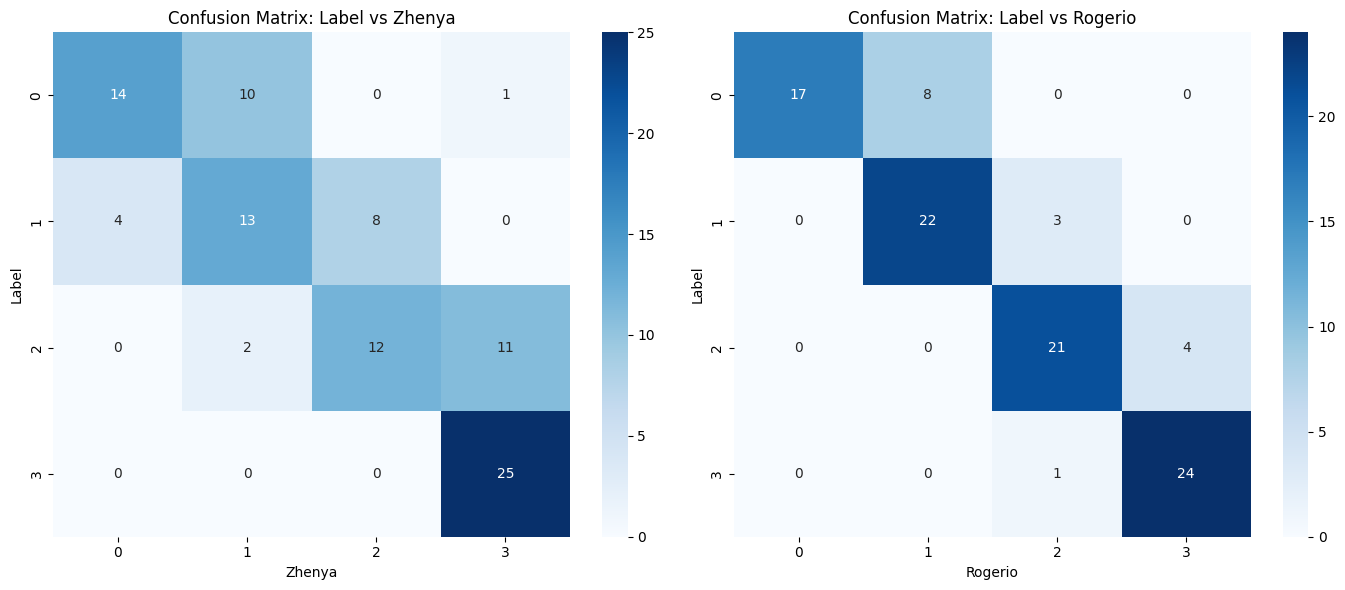

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix_zhenya = confusion_matrix(random_df['label'], random_df['zhenya'])
conf_matrix_rogerio = confusion_matrix(random_df['label'], random_df['rogerio'])

# Plotting confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(conf_matrix_zhenya, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix: Label vs Zhenya')
ax[0].set_xlabel('Zhenya')
ax[0].set_ylabel('Label')

sns.heatmap(conf_matrix_rogerio, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix: Label vs Rogerio')
ax[1].set_xlabel('Rogerio')
ax[1].set_ylabel('Label')

plt.tight_layout()
plt.show()

In [63]:
random_df['zhenya'] = df_zh['Unnamed: 1']
random_df['rogerio'] = df_ro['score']

zh_score = len(random_df[random_df['zhenya'] == random_df['label']]) / len(random_df)
print("zh_score general", zh_score)

ro_score = len(random_df[random_df['rogerio'] == random_df['label']]) / len(random_df)
print("ro_score general", ro_score)

for i in range(1, 5):
    print()
    label_df = random_df[random_df['label'] == i]
    zh_score = len(label_df[label_df['zhenya'] == label_df['label']]) / len(label_df)
    print("zh_score label", i, zh_score)

    ro_score = len(label_df[label_df['rogerio'] == label_df['label']]) / len(label_df)
    print("ro_score label", i, ro_score)





zh_score general 0.64
ro_score general 0.84

zh_score label 1 0.56
ro_score label 1 0.68

zh_score label 2 0.52
ro_score label 2 0.88

zh_score label 3 0.48
ro_score label 3 0.84

zh_score label 4 1.0
ro_score label 4 0.96


In [65]:
random_df.to_csv("data/samsung-merged-evaluations.csv")

In [3]:
import pandas as pd
df = pd.read_csv("data/samsung-questions-responses.csv")

In [5]:
df_melted = df.melt(id_vars=["question"],
                    value_vars=["very_positive", "subtly_positive", "very_negative", "subtly_negative"],
                    var_name="sentiment",
                    value_name="answer")

df_melted



,question,sentiment,answer
0,What are the top 3 benefits of Galaxy AI?,very_positive,The Galaxy AI on Samsung devices offers unpara...
1,What are the main differences between the Sams...,very_positive,The Samsung Galaxy S23 and S23+ are both excep...
2,Does the Samsung Galaxy S23 Ultra support 8K v...,very_positive,"Absolutely, the Samsung Galaxy S23 Ultra suppo..."
3,How does the battery life of the Galaxy S23+ c...,very_positive,The Galaxy S23+ offers a significant improveme...
4,Can I use a stylus with the Samsung Galaxy S23...,very_positive,Absolutely! The Samsung Galaxy S23 Ultra suppo...
...,...,...,...
399,What are the health tracking features of the G...,subtly_negative,The Galaxy Watch 6 Classic offers a range of h...
400,Does the Samsung Galaxy Watch 6 have a blood p...,subtly_negative,"Yes, the Samsung Galaxy Watch 6 includes a blo..."
401,How does the battery life of the Galaxy Watch ...,subtly_negative,The Galaxy Watch 6 Classic offers a decent bat...
402,Is the Samsung Galaxy Watch 6 waterproof?,subtly_negative,The Samsung Galaxy Watch 6 offers water resist...


In [6]:
# Map sentiment to the correct labels
sentiment_mapping = {
    "very_positive": "very_positive",
    "subtly_positive": "subtly_positive",
    "very_negative": "very_negative",
    "subtly_negative": "subtly_negative"
}

df_melted["sentiment"] = df_melted["sentiment"].map(sentiment_mapping)

# Reset index and rename columns as required
df_melted.reset_index(drop=True, inplace=True)

# Save the DataFrame to CSV
df_melted.to_csv('data/samsung-labeled-transformed.csv', index=False)

print(df_melted)

                                              question        sentiment  \
0            What are the top 3 benefits of Galaxy AI?    very_positive   
1    What are the main differences between the Sams...    very_positive   
2    Does the Samsung Galaxy S23 Ultra support 8K v...    very_positive   
3    How does the battery life of the Galaxy S23+ c...    very_positive   
4    Can I use a stylus with the Samsung Galaxy S23...    very_positive   
..                                                 ...              ...   
399  What are the health tracking features of the G...  subtly_negative   
400  Does the Samsung Galaxy Watch 6 have a blood p...  subtly_negative   
401  How does the battery life of the Galaxy Watch ...  subtly_negative   
402          Is the Samsung Galaxy Watch 6 waterproof?  subtly_negative   
403  Can you use the Galaxy Watch 6 for contactless...  subtly_negative   

                                                answer  
0    The Galaxy AI on Samsung devices offe